In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pylab import rcParams
import statsmodels.api as sm

In [60]:
df=pd.read_csv('raw_sales.csv')

In [4]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [6]:
df['propertyType'].value_counts()

house    24552
unit      5028
Name: propertyType, dtype: int64

In [7]:
df['bedrooms'].value_counts()

3    11933
4    10442
2     3598
5     1950
1     1627
0       30
Name: bedrooms, dtype: int64

In [15]:
print("Time period from {} to {}".format(df.datesold.min(), df.datesold.max()))

Time period from 2007-02-07 00:00:00 to 2019-07-27 00:00:00


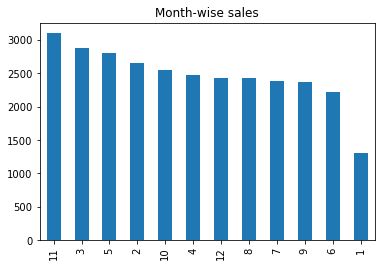

In [29]:
plt.title('Month-wise sales')
pd.to_datetime(df.datesold).dt.month.value_counts().plot(kind='bar')

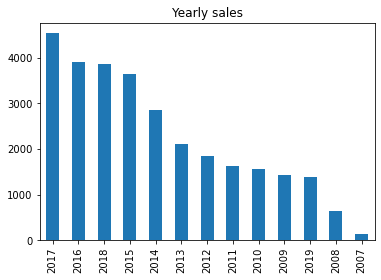

In [27]:
# Yearly number of house sales between 2007 and 2019
plt.title('Yearly sales')
pd.to_datetime(df.datesold).dt.year.value_counts().plot(kind='bar')

(-1.1062735784564333,
 1.1060571843127553,
 -1.1058990226661722,
 1.1039583716883157)

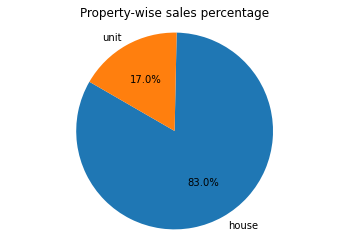

In [26]:
plt.pie(df['propertyType'].value_counts(), labels=['house','unit'], autopct='%1.1f%%', startangle = 150)
plt.title('Property-wise sales percentage')
plt.axis('equal')

In [30]:
df.corr()

,postcode,price,bedrooms
postcode,1.000000,-0.150548,0.225761
price,-0.150548,1.000000,0.484212
bedrooms,0.225761,0.484212,1.000000


In [31]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [61]:
df2['datesold']= pd.to_datetime(df2['datesold'])

In [80]:
df2.head()

,datesold,postcode,price,propertyType,bedrooms,postcode_bin
0,2007-02-07,2607,525000,house,4,"(2600, 2700]"
1,2007-02-27,2906,290000,house,3,"(2801, 2915]"
2,2007-03-07,2905,328000,house,3,"(2801, 2915]"
3,2007-03-09,2905,380000,house,4,"(2801, 2915]"
4,2007-03-21,2906,310000,house,3,"(2801, 2915]"


In [33]:
df1 = df.copy()
df1.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [46]:
df1.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [62]:
# We bin the postcode for easier analysis
bins = pd.IntervalIndex.from_tuples([(2600, 2700), (2701, 2800), (2801, 2915)])
df2['postcode_bin'] = pd.cut(df2['postcode'],bins)

In [63]:
from pandas import Interval

# House sales in postcode 2600 - 2700
data1 = df2[df2.postcode_bin == Interval(2600, 2700, closed='right')]

# House sales in postcode 2801-2915
data2 = df2[df2.postcode_bin == Interval(2801, 2915, closed='right')]

Text(0, 0.5, 'Average Price')

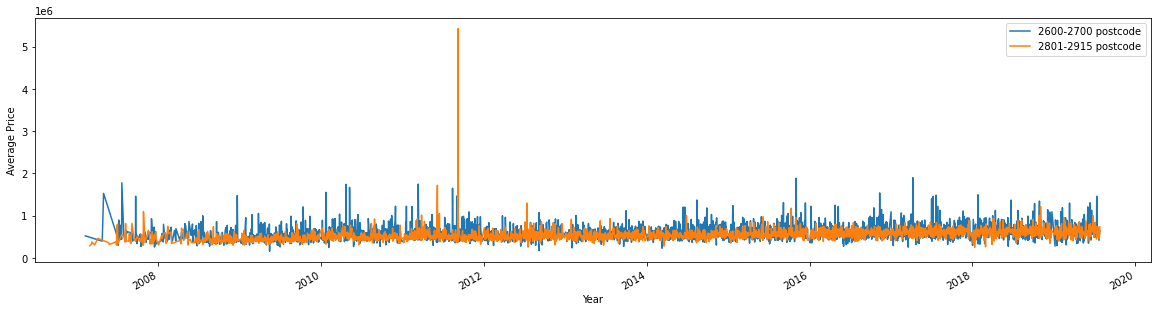

In [64]:
# Average sale price of houses for each of the two postcode bins
rcParams['figure.figsize'] = 20,5 
data1.groupby('datesold').price.mean().plot()
data2.groupby('datesold').price.mean().plot()
plt.legend(['2600-2700 postcode', '2801-2915 postcode'])
plt.xlabel("Year")
plt.ylabel("Average Price")

In [ ]:
### There is an immense increase in prices around 

<ipython-input-65-007641d2772a>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sm.tsa.seasonal_decompose(data1.groupby('datesold').price.mean(), freq=12).plot()


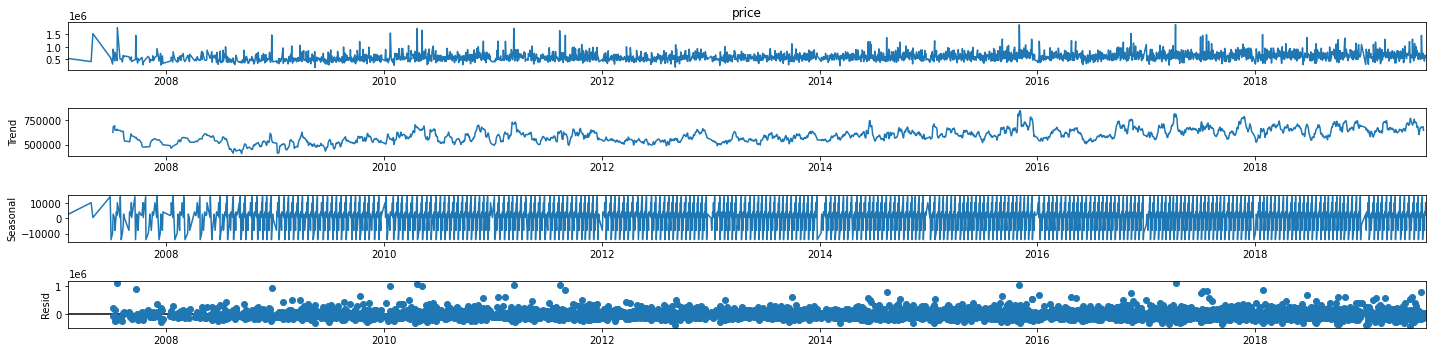

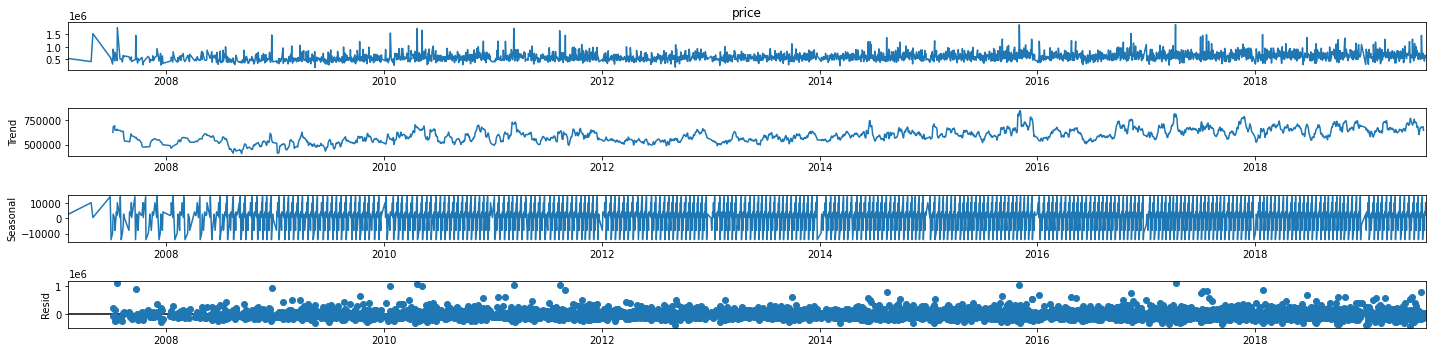

In [65]:
sm.tsa.seasonal_decompose(data1.groupby('datesold').price.mean(), freq=12).plot()

In [68]:
data_house = df2[df2.propertyType == 'house'] 
data_unit = df2[df2.propertyType == 'unit']

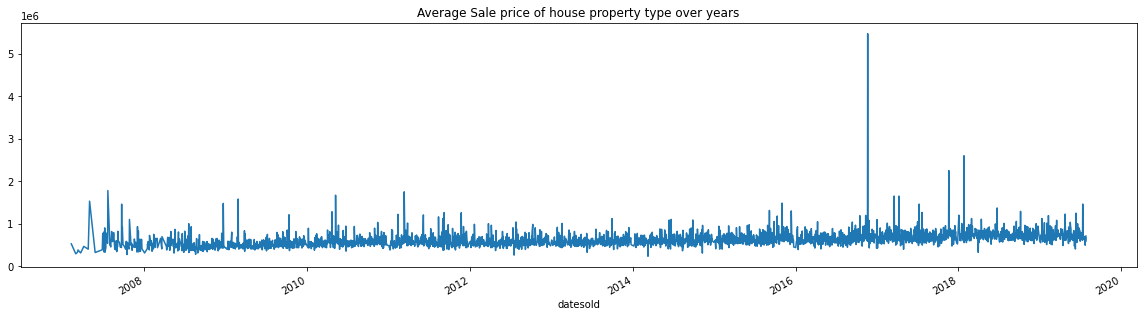

In [70]:
plt.title('Average Sale price of house property type over years')
data_house.groupby(['datesold']).price.mean().plot()

<ipython-input-71-b827356bebbe>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sm.tsa.seasonal_decompose(data_house.groupby('datesold').price.mean(), freq=365).plot()


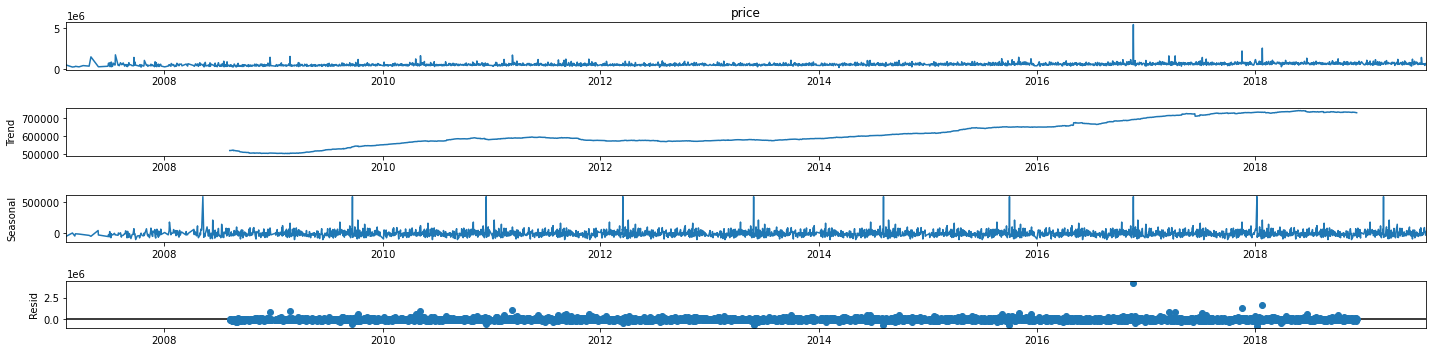

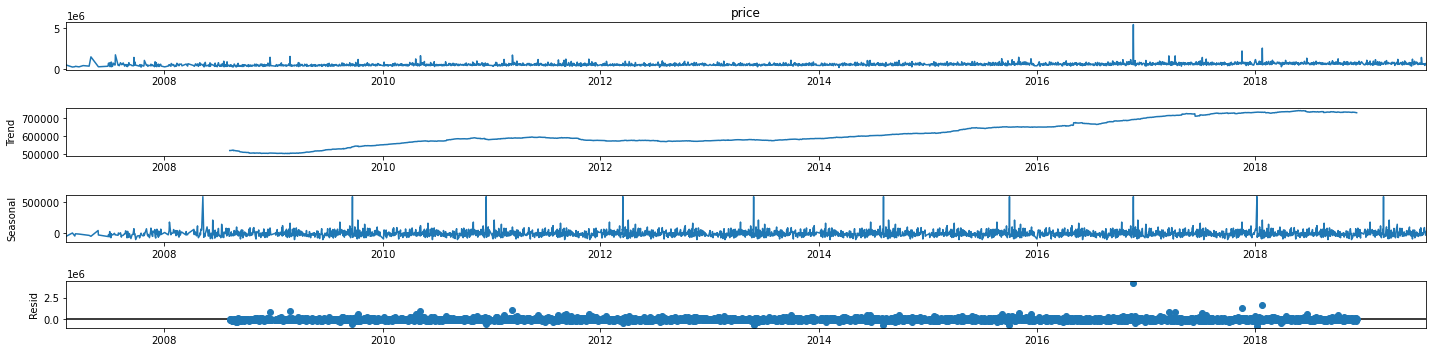

In [71]:
sm.tsa.seasonal_decompose(data_house.groupby('datesold').price.mean(), freq=365).plot()

<ipython-input-73-286025f99dbf>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sm.tsa.seasonal_decompose(data_unit.groupby('datesold').price.mean(), freq=365).plot()


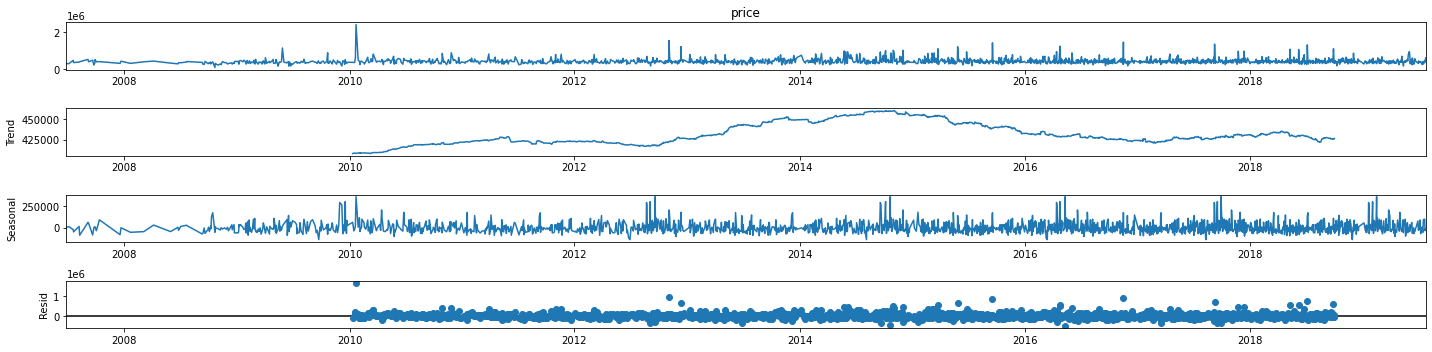

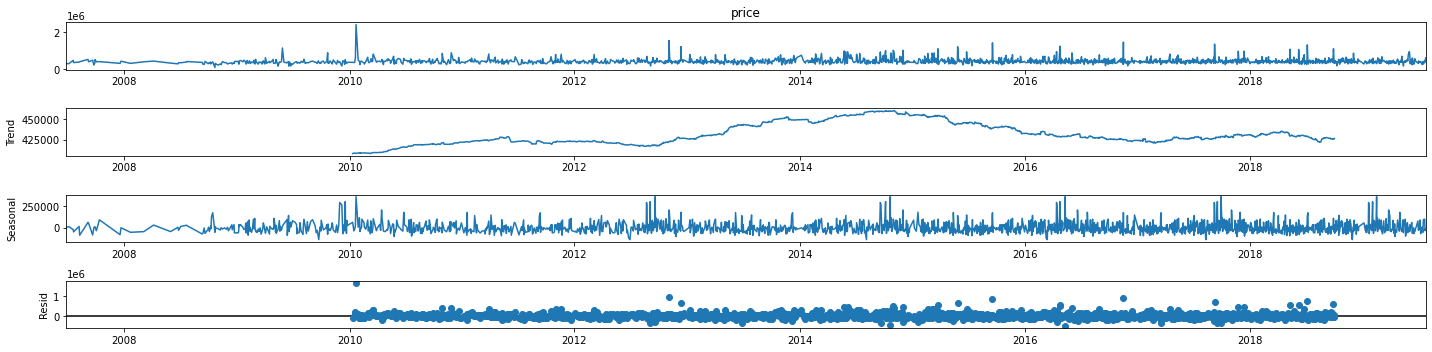

In [73]:
sm.tsa.seasonal_decompose(data_unit.groupby('datesold').price.mean(), freq=365).plot()

In [74]:
df3=df2.copy()

In [79]:
df3['datesold_year'] = df3['datesold'].dt.year
sns.line(x= 'datesold_year', y = 'price', data=df3)
sns.boxplot(x= 'datesold_year', y = 'price', data=df3)

AttributeError: module 'seaborn' has no attribute 'line'

In [ ]:
### There is an abrubt increase in price around 2016